## CSD is a spectral dataset that is comprised of 3091 spectra from 361 SNe Ia.
- This sample largely consists of observations from four SN programs:
    - (a) Harvard-Smithsonian Center for Astrophysics (CfA, Blondin et al. 2012);
    - (b) Berkeley SuperNova Ia Program (BSNIP, Silverman et al. 2012);
    - (c) Carnegie Supernova Program (CSP, Folatelli et al. 2013);
    - (d) Supernova Polarimetry Program (Wang & Wheeler 2008; Cikota et al. 2019a; Yang et al. 2020)
#### &emsp;
- The SNe in CSD are selected with the following criteria:
    - (i) The redshift of the host galaxy and the time of B-band maximum are accurately measured.
    - (ii) The SN is classiﬁed as one of the following ﬁve sub-types: Ia-norm, Ia-91T, Ia-91bg, Ia-99aa, and Iax.
    - (iii) The spectrum of the SN is between -15 and 33 days relative to the B-band maximum, and the wavelength covers from 3800 to 7200Å in the rest frame.
    - (iv) The SN has more than two distinct spectra.

In [1]:
import os
import sys
import warnings
import numpy as np
from astropy.table import Table
from snail.AccessArchivalData import AccessDB

# FIXME, use your path of the dataset downloaded from Zenodo.
DBDir = '/home/thomas/Lpackages/snail-db'
assert os.path.exists(DBDir)

### 1.1 Show the complete list of SNe in CSD dataset

In [2]:
AccessDB(SN_name=None, DBDir=DBDir)

SN2012fr Ia-norm | z=0.005457 NumSpec=74
SN2005cf Ia-norm | z=0.006461 NumSpec=73
SN2011fe Ia-norm | z=0.000804 NumSpec=68
SN2002bo Ia-norm | z=0.004240 NumSpec=44
SN2006X Ia-norm | z=0.005240 NumSpec=40
SN1994D Ia-norm | z=0.002058 NumSpec=38
SN2007le Ia-norm | z=0.006721 NumSpec=36
SN2003du Ia-norm | z=0.006384 NumSpec=35
SN2004dt Ia-norm | z=0.019730 NumSpec=32
SN2003cg Ia-norm | z=0.004130 NumSpec=32
SN2001V Ia-norm | z=0.015018 NumSpec=27
SN2007af Ia-norm | z=0.005464 NumSpec=27
SN2002er Ia-norm | z=0.008569 NumSpec=26
SN2007co Ia-norm | z=0.026962 NumSpec=25
SN1999by Ia-91bg | z=0.002128 NumSpec=25
SN2013dy Ia-norm | z=0.003890 NumSpec=24
SN2005hk Iax | z=0.012993 NumSpec=24
SN1999ac Ia-norm | z=0.009500 NumSpec=23
SNF20080514-002 Ia-norm | z=0.022095 NumSpec=23
SN1999dq Ia-99aa-like | z=0.014327 NumSpec=21
SN2001ep Ia-norm | z=0.013129 NumSpec=21
SN2002dj Ia-norm | z=0.009393 NumSpec=21
SN1999aa Ia-99aa-like | z=0.014443 NumSpec=20
SN2005am Ia-norm | z=0.007899 NumSpec=20
SN2003

### 1.2 Check SN attributes with given SN name

In [3]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).SN_Attributes()

{'SN_name': 'SN2011by',
 'RA_J2000': 178.93983,
 'DEC_J2000': 55.32606,
 'Subtype': 'Ia-norm',
 'Redshift': 0.002843,
 'MJD_Bmax': 55690.6,
 'Subtype_ref': '2019MNRAS.490.3882S',
 'Redshift_ref': 'Kaepora',
 'MJD_Bmax_ref': '2016MNRAS.457.1000S',
 'Num_Spec': 9}

### 1.3 Search available spectra with given SN name & phase range
- Note: each spectrum in CSD has an unique Spec_ID. without given phase range, this function returns the Spec_ID list for all spectra of the SN.

In [4]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Search_SpecID(PhaseRange=None, verbose=True)

Spec ID : 21738 (Phase : -11.57 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21740 (Phase : -5.58 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21742 (Phase : -3.59 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 104873 (Phase : -0.24 d) (Tel / Inst : HST / STIS)
Spec ID : 21745 (Phase : 0.40 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21746 (Phase : 4.39 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21747 (Phase : 12.36 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21748 (Phase : 15.36 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21749 (Phase : 29.32 d) (Tel / Inst : Lick-3m / KAST)


[21738, 21740, 21742, 104873, 21745, 21746, 21747, 21748, 21749]

In [5]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Search_SpecID(PhaseRange=(-5.0, 5.0), verbose=True)

Spec ID : 21742 (Phase : -3.59 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 104873 (Phase : -0.24 d) (Tel / Inst : HST / STIS)
Spec ID : 21745 (Phase : 0.40 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21746 (Phase : 4.39 d) (Tel / Inst : Lick-3m / KAST)


[21742, 104873, 21745, 21746]

### 1.4 Check Spectrum attributes with given SN name & Spec ID

In [6]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Spec_Attributes(Spec_ID=21738)

{'Spec_ID': 21738,
 'SN_name': 'SN2011by',
 'MJD_OBS': 55679.0,
 'Phase': -11.567114692926555,
 'Tel_Inst': 'Lick-3m / KAST',
 'RawSpec_DeRedshifted_Type': 'No,VI',
 'RawSpec_Median_SNR': 186.45470943832495,
 'HomoSpec_ColorCorrectness_Sigma': 0.003044856527074028,
 'RawSpec_ref': 'None'}

### 2.1 Retrieve Spectroscopic Observation with given SN name & Spec ID
- Three types available for each spectrum 
    - Raw: the downloaded raw spectrum. 
    - Homogenized: processed Raw spectrum with deredshifting & SG-smooth & rebinning 
        - Normalized Flux & Wavelength Coverage: 3800-7200Å
    - Corrected: processed Homogenized spectrum with lines removal (telluric and emission) & color calibration by photometry 
        - Normalized Flux & Wavelength Coverage: 3800-7200Å

In [7]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=21748, data_type='Raw', deredshift_rawspec=True)

wavelength,flux
float64,float64
3426.259145250054,4.12767
3428.2534753695245,4.2567
3430.2478054889953,4.50068
3432.2421356084656,4.28658
3434.236465727936,4.12924
3436.230795847406,4.57261
3438.2251259668765,4.48676
3440.219456086347,4.6595
3442.213786205817,4.5345


In [8]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=21748, data_type='Homogenized')

wavelength,flux
int64,float64
3800,0.6041342389342362
3802,0.5894664628648854
3804,0.5794837643542584
3806,0.575287448261825
3808,0.5770536809645405
3810,0.5848405231407834
3812,0.5961609746859714
3814,0.6158195989080929
3816,0.6352391872990725


In [9]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=21748, data_type='Corrected')

wavelength,flux
int64,float64
3800,0.5836732642751469
3802,0.5695263728307686
3804,0.5599051194517211
3806,0.5558742189073267
3808,0.5576046123842822
3810,0.5651531433971051
3812,0.5761171762203804
3814,0.5951403788030033
3816,0.6139342516173175


### 2.2 Retrieve auxiliary B & V photometric data with given SN name 
- Note: the photometry data stored in CSD were used to perform color calibration of spectral data (196 in 361 SNe available).

In [10]:
AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_BVphot()

>>> B band: natural system with filter B(Swift-UVOT)
    (find transmission curves at /home/thomas/miniconda3/envs/gspec/lib/python3.7/site-packages/snlstm-1.0.1-py3.7.egg/snlstm/utils/helper/transmission_curves/B(Swift-UVOT).txt)
>>> V band: natural system with filter V(Swift-UVOT)
    (find transmission curves at /home/thomas/miniconda3/envs/gspec/lib/python3.7/site-packages/snlstm-1.0.1-py3.7.egg/snlstm/utils/helper/transmission_curves/V(Swift-UVOT).txt)


SN_name,Phase,MJD_OBS,MAG,eMAG,Passband,Instrument,Contributing_Group,Photometry_ref
str8,float64,float64,float64,float64,str13,str10,str5,str19
SN2011by,-11.600818871943039,55678.9662,14.484,0.043,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-10.465147585412543,55680.1051,14.092,0.042,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-9.1985485265379,55681.3753,13.854,0.041,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-8.010625790876794,55682.5666,13.547,0.04,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-6.87784628301903,55683.7026,13.41,0.04,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-6.178035844094344,55684.4044,13.287,0.04,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-4.5643236279230095,55686.0227,13.114,0.029,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-4.497812718442899,55686.0894,13.102,0.029,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B
SN2011by,-4.366286647063516,55686.2213,13.104,0.029,B(Swift-UVOT),Swift-UVOT,SOUSA,2014Ap&SS.354...89B


### Figure: show a spectrum in various proc-types (Raw & Homogenized & Corrected)

<IPython.core.display.Javascript object>


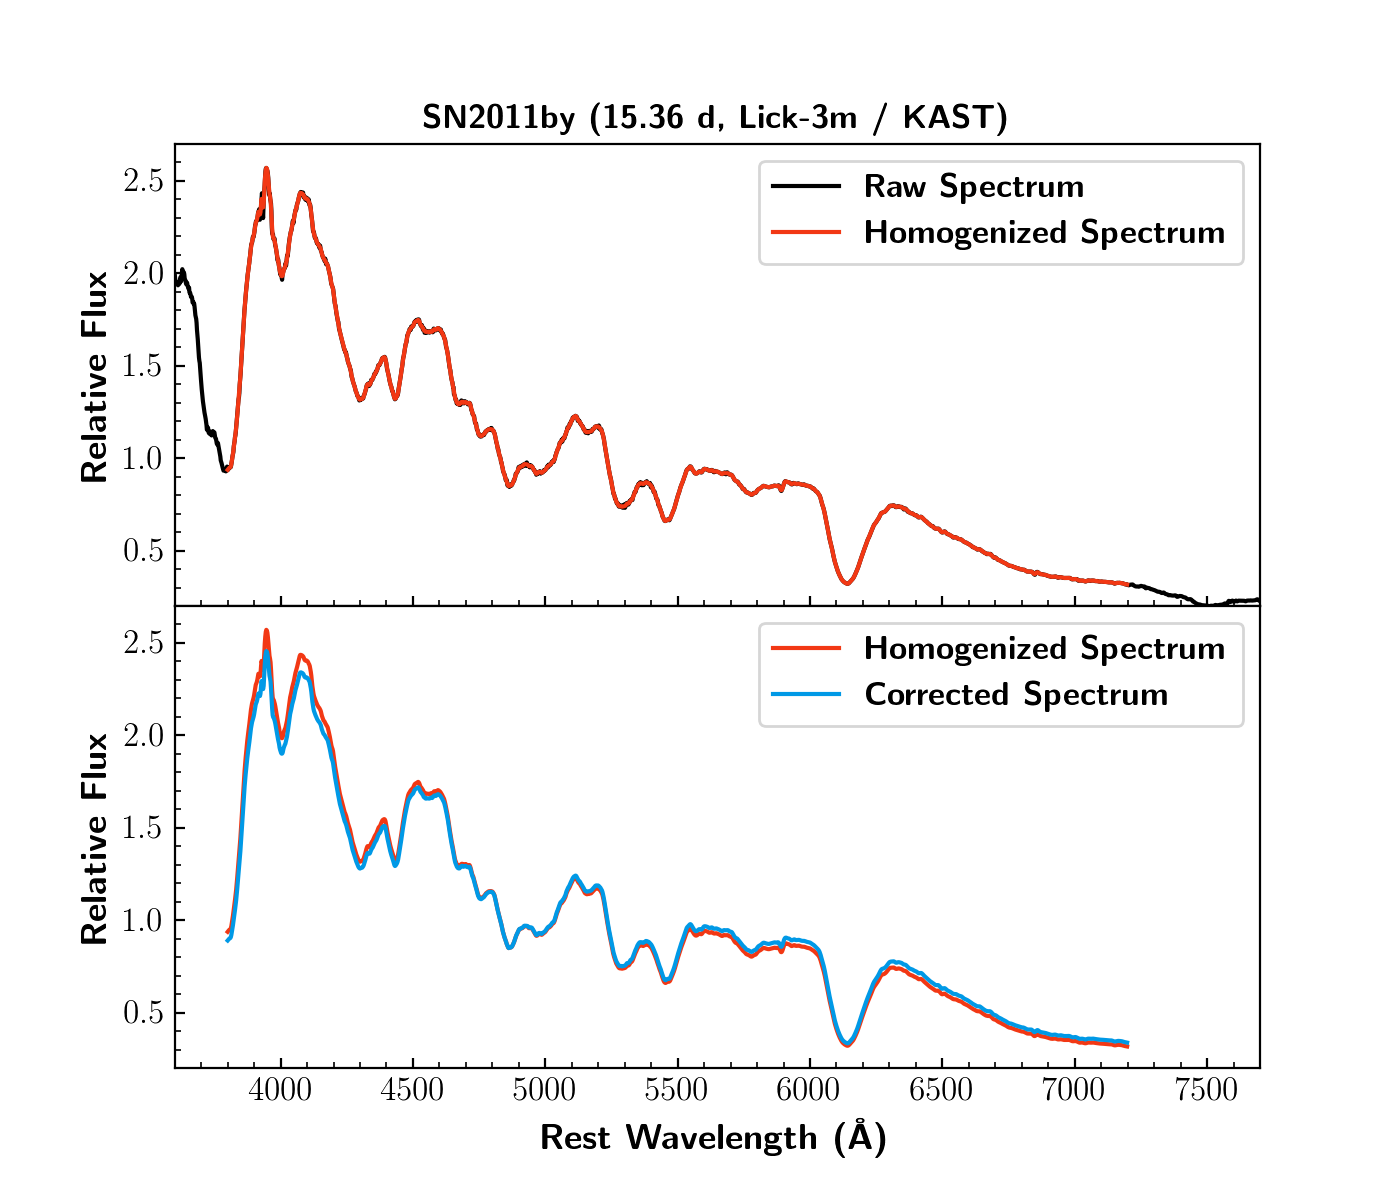

In [11]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
matplotlib.rc('text', usetex=True)

AstSpecRaw = AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=104873, data_type='Raw', deredshift_rawspec=True)
AstSpecHomo = AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=104873, data_type='Homogenized')
AstSpecCorr = AccessDB(SN_name='SN2011by', DBDir=DBDir).Retrieve_SpecObs(Spec_ID=104873, data_type='Corrected')

WRaw, FRaw = np.array(AstSpecRaw['wavelength']), np.array(AstSpecRaw['flux'])
WHomo, FHomo = np.array(AstSpecHomo['wavelength']), np.array(AstSpecHomo['flux'])
WCorr, FCorr = np.array(AstSpecCorr['wavelength']), np.array(AstSpecCorr['flux'])
normal_factor = np.mean(FRaw[np.logical_and(WRaw >= WHomo[0], WRaw <= WHomo[-1])])  # rescale overall flux Raw > Homo

%matplotlib nbagg
fig = plt.figure(figsize=(7, 6))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.subplots_adjust(hspace=0.0, wspace=0.0)

axU = plt.subplot(211)
axU.plot(WRaw, FRaw/normal_factor, '-', color='black', linewidth=1.5, label=r'\textbf{Raw Spectrum}')
axU.plot(WHomo, FHomo, '-', color='#F23814', linewidth=1.5, label=r'\textbf{Homogenized Spectrum}')

axU.tick_params(top=False, bottom=True, left=True, right=False, \
    labelleft=True, labelright=False, labelbottom=False, labeltop=False)

axU.xaxis.set_minor_locator(MultipleLocator(100))
axU.xaxis.set_major_locator(MultipleLocator(500))
axU.yaxis.set_minor_locator(MultipleLocator(0.1))
axU.yaxis.set_major_locator(MultipleLocator(0.5))

axU.set_ylabel(r'\textbf{Relative Flux}', fontsize=13)
plt.setp(axU.get_yticklabels(), fontsize=12)
axU.set_xlim(3601, 7700)
axU.set_ylim(0.2, 2.7)
axU.legend(fontsize=12)

_dict = AccessDB(SN_name='SN2011by', DBDir=DBDir).Spec_Attributes(Spec_ID=21748)
axU.set_title(r'\textbf{%s (%.2f d, %s)}' %(_dict['SN_name'], _dict['Phase'], _dict['Tel_Inst']))

axL = plt.subplot(212)
axL.plot(WHomo, FHomo, '-', color='#F23814', linewidth=1.5, label=r'\textbf{Homogenized Spectrum}')
axL.plot(WCorr, FCorr, '-', color='#0099E6', linewidth=1.5, label=r'\textbf{Corrected Spectrum}')

axL.xaxis.set_minor_locator(MultipleLocator(100))
axL.xaxis.set_major_locator(MultipleLocator(500))
axL.yaxis.set_minor_locator(MultipleLocator(0.1))
axL.yaxis.set_major_locator(MultipleLocator(0.5))

axL.set_xlabel(r'\textbf{Rest Wavelength (\AA)}', fontsize=13)
axL.set_ylabel(r'\textbf{Relative Flux}', fontsize=13)
plt.setp(axL.get_xticklabels(), fontsize=12)
plt.setp(axL.get_yticklabels(), fontsize=12)

axL.set_xlim(3601, 7700)
axL.set_ylim(0.2, 2.7)
axL.legend(fontsize=12)
plt.show()
